In [3]:
import pandas as pd
import networkx as nx
import random
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('facebook_combined.txt', delimiter=" ")
df.columns =['FromNodeId', 'ToNodeId']
g = nx.from_pandas_edgelist(df, 'FromNodeId', 'ToNodeId', create_using=nx.Graph())
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88233
Average degree:  43.6905


In [3]:
s = []
sr = []
iterations = {}
node_colors = ['blue' for node in g.nodes()]
def color():
    for x in sr:
        if x not in s:
            s.append(x)
    for node in g.nodes():
        if node in s:
            node_colors[node] = 'red'

In [4]:
def find_random_node():
    random_node = random.choice(list(g.nodes()))
    if random_node not in s:
        s.append(random_node)
    color()

In [5]:
def report_percentage(iteration):
    print("iteration: ", iteration)
    p = round(((len(s) / len(g.nodes())) * 100), 2)
    print("percentage: ", p, "%")
    iterations[iteration] = p

iteration:  0
percentage:  0.0 %


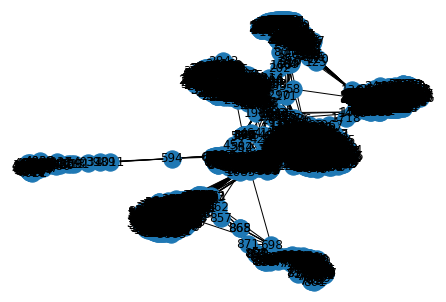

In [6]:
iteration = 0
report_percentage(iteration)
nx.draw(g, with_labels=True)

iteration:  1
percentage:  0.02 %


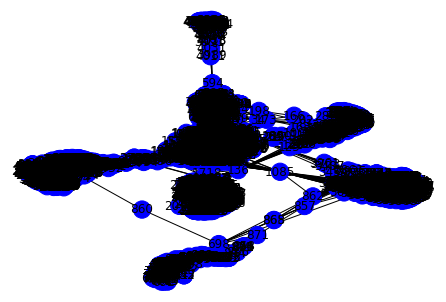

In [7]:
iteration = 1
find_random_node()
report_percentage(iteration)
nx.draw(g, node_color = node_colors, with_labels=True)

In [8]:
def find_neighbor():
    sr[:] = []
    for i in s:
        for n in list(g.neighbors(i)):
            if n not in s:
                sr.append(n)
    color()

iteration:  2
percentage:  0.74 %


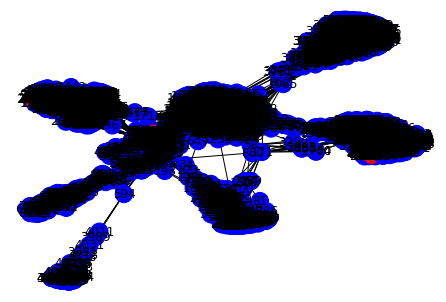

In [9]:
iteration = 2
find_neighbor()
report_percentage(iteration)
nx.draw(g, node_color = node_colors, with_labels=True)

iteration:  3
percentage:  20.35 %


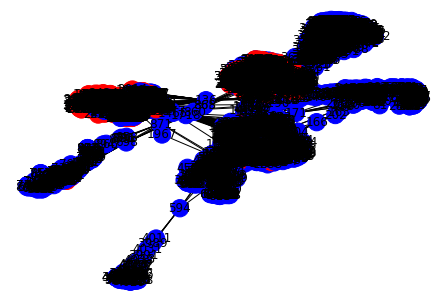

In [10]:
iteration = 3
find_neighbor()
report_percentage(iteration)
nx.draw(g, node_color = node_colors, with_labels=True)

iteration:  4
percentage:  45.33 %


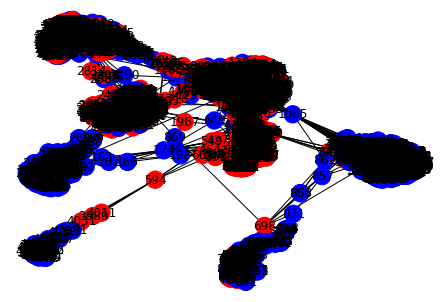

In [11]:
iteration = 4
find_neighbor()
report_percentage(iteration)
nx.draw(g, node_color = node_colors, with_labels=True)

iteration:  5
percentage:  82.37 %


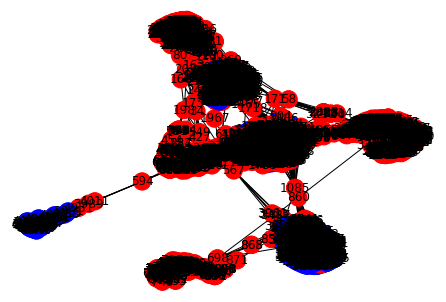

In [12]:
iteration = 5
find_neighbor()
report_percentage(iteration)
nx.draw(g, node_color = node_colors, with_labels=True)

iteration:  6
percentage:  98.64 %


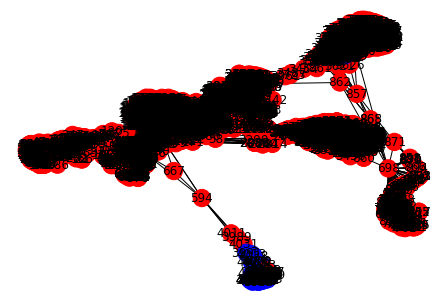

In [13]:
iteration = 6
find_neighbor()
report_percentage(iteration)
nx.draw(g, node_color = node_colors, with_labels=True)

iteration:  7
percentage:  100.0 %


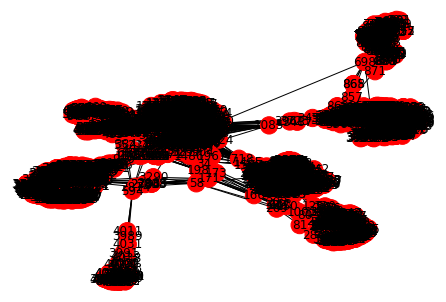

In [14]:
iteration = 7
find_neighbor()
report_percentage(iteration)
nx.draw(g, node_color = node_colors, with_labels=True)

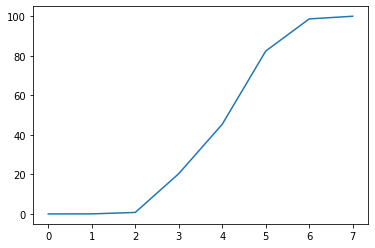

In [15]:
x = iterations.keys()
y = iterations.values()
plt.plot(x, y)
plt.show()

In [5]:
degrees = [val for (node, val) in sorted(g.degree(), key=lambda pair: pair[0])]

In [33]:
max_degree = max(degrees)
most_important_node = degrees.index(max_degree)
print(max_degree)
print(most_important_node)

1045
107


In [47]:
s = []
sr = []
iterations = {}
def output():
    iteration = 0
    while len(s) != len(list(g.nodes())):
        if iteration == 0:
            report_percentage(iteration)
        elif iteration == 1:
            s.append(most_important_node)
            color()
            report_percentage(iteration)
        else:
            find_neighbor()
            report_percentage(iteration)
        iteration += 1

In [48]:
output()

iteration:  0
percentage:  0.0 %
iteration:  1
percentage:  0.02 %
iteration:  2
percentage:  25.9 %
iteration:  3
percentage:  66.5 %
iteration:  4
percentage:  93.59 %
iteration:  5
percentage:  96.48 %
iteration:  6
percentage:  100.0 %


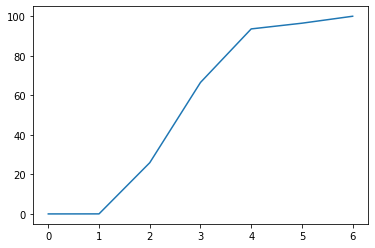

In [49]:
x = iterations.keys()
y = iterations.values()
plt.plot(x, y)
plt.show()